In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import metrics

In [3]:
import random

# Base

In [4]:
# Importando a base
train = pd.read_csv('train_treated.csv', index_col=0)

In [5]:
train.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
446,1,1,0,4.0,0,2,81.8583,0,0,1
519,1,2,1,36.0,1,0,26.0000,0,0,1
623,1,3,0,20.0,1,1,15.7417,1,0,0
201,0,3,0,28.0,0,0,9.5000,0,0,1
345,0,2,0,36.0,0,0,13.0000,0,0,1
705,0,3,0,26.0,1,0,7.8542,0,0,1
858,1,1,0,51.0,0,0,26.5500,0,0,1
591,0,3,0,35.0,0,0,7.1250,0,0,1
495,0,3,0,21.0,0,0,8.0500,0,0,1


## Dividindo entre treino e teste

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop(columns=['Survived']), train['Survived'], test_size=0.25, random_state=0)

In [7]:
# Removendo sex
x_train_nosex, x_test_nosex, y_train_nosex, y_test_nosex = train_test_split(train.drop(columns=['Survived', 'Sex']), train['Survived'], test_size=0.25, random_state=0)

# Linear Regression

In [8]:
# Importando
from sklearn.linear_model import LinearRegression
# Instanciando com default
linearR_default = LinearRegression()

In [9]:
# Treinando e prevendo
linearR_default.fit(x_train, y_train)
linearR_predict = linearR_default.predict(x_test)

In [10]:
linearR_predict.round()

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1., -0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1., -0.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0., -0.,  0.,  0.,
        0., -0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0

In [11]:
linearR_default.coef_

array([-1.59154223e-01,  5.10946658e-01, -5.86036750e-03, -4.45459031e-02,
       -8.48384721e-03,  2.49619322e-04, -1.03496128e-01, -1.05189773e-01,
       -1.68147545e-01])

In [12]:
linearR_accuracy = metrics.accuracy_score(linearR_predict.round(), y_test)
linearR_accuracy

0.7802690582959642

In [13]:
# Treinando e prevendo (SEM SEX)
linearR_default.fit(x_train_nosex, y_train_nosex)
linearR_predict = linearR_default.predict(x_test_nosex)

In [14]:
linearR_nosex_accuracy = metrics.accuracy_score(linearR_predict.round(), y_test_nosex)
linearR_nosex_accuracy

0.7399103139013453

# Logistic Regression

In [15]:
# Importando
from sklearn.linear_model import LogisticRegression
# Instanciando
logisticR = LogisticRegression(max_iter=350)

In [16]:
# Treinando e prevendo
logisticR.fit(x_train, y_train)
logisticR_predict = logisticR.predict(x_test)

In [17]:
logisticR_accuracy = metrics.accuracy_score(logisticR_predict, y_test)
logisticR_accuracy

0.7937219730941704

In [18]:
# Treinando e prevendo (SEM SEX)
logisticR.fit(x_train_nosex, y_train_nosex)
logisticR_predict = logisticR.predict(x_test_nosex)

In [19]:
logisticR_nosex_accuracy = metrics.accuracy_score(logisticR_predict.round(), y_test_nosex)
logisticR_nosex_accuracy

0.7533632286995515

# Máquina de Vetor Suporte

In [20]:
# Importando
from sklearn.svm import SVC
# Instanciando
supportV = SVC()

In [21]:
# Treinando e prevendo
supportV.fit(x_train, y_train)
supportV_predict = supportV.predict(x_test)

In [22]:
supportV_accuracy = metrics.accuracy_score(supportV_predict, y_test)
supportV_accuracy

0.7219730941704036

# Decision tree

In [23]:
# Importando
from sklearn.tree import DecisionTreeClassifier
# Instanciando
decisionT = DecisionTreeClassifier(random_state=42)

In [24]:
# Treinando e prevendo
decisionT.fit(x_train, y_train)
decisionT_predict = decisionT.predict(x_test)

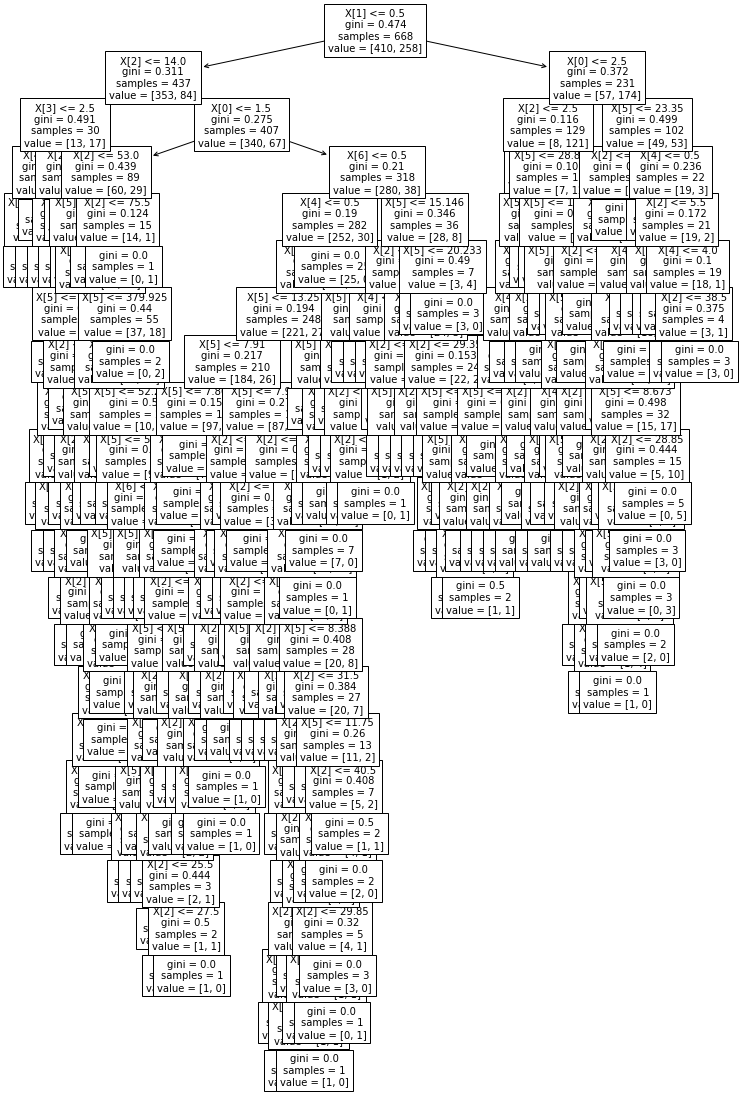

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 20))
plot_tree(decisionT, fontsize=10)
plt.show()

In [26]:
decisionT_accuracy = metrics.accuracy_score(decisionT_predict, y_test)
decisionT_accuracy

0.7533632286995515

# Redes Neurais

In [31]:
# Importando
from sklearn.neural_network import MLPClassifier
# Instanciando
neuralN = MLPClassifier(random_state=42, max_iter=700)

In [32]:
# Treinando e prevendo
neuralN.fit(x_train, y_train)
neuralN_predict = neuralN.predict(x_test)

In [33]:
neuralN_accuracy = metrics.accuracy_score(neuralN_predict, y_test)
neuralN_accuracy

0.7982062780269058

# Scores

In [34]:
scores = pd.DataFrame({
    'Model': ['Linear', 'Logistic', 'SVM', 'Decision Tree', 'Neural Network'],
    'Score': [ linearR_accuracy, logisticR_accuracy, supportV_accuracy, decisionT_accuracy, neuralN_accuracy]
})
scores.sort_values(by='Score', ascending=False)

,Model,Score
4,Neural Network,0.798206
1,Logistic,0.793722
0,Linear,0.780269
3,Decision Tree,0.753363
2,SVM,0.721973
